In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
#csv inflation US
inflation = pd.read_csv("Data_files/inflation.csv")
#print(inflation)

#considering only inflation from 2015 to 2022
inflation_from_2015 = inflation[inflation["Year"] > 2014]

#adding values substituing NaN values from may to dec 2022
#link della fonte: https://www.usinflationcalculator.com/inflation/consumer-price-index-and-annual-percent-changes-from-1913-to-2008/
values = {'May': 292.296, 'Jun': 296.311, 'Jul': 296.276, 'Aug': 296.171, 'Sep': 296.808, 'Oct': 298.012, 'Nov': 297.711, 'Dec': 00}
inflation_from_2015= inflation_from_2015.fillna(value=values)
inflation_from_2015

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
102,2015,233.707,234.722,236.119,236.599,237.805,238.638,238.654,238.316,237.945,237.838,237.336,236.525
103,2016,236.916,237.111,238.132,239.261,240.229,241.018,240.628,240.849,241.428,241.729,241.353,241.432
104,2017,242.839,243.603,243.801,244.524,244.733,244.955,244.786,245.519,246.819,246.663,246.669,246.524
105,2018,247.867,248.991,249.554,250.546,251.588,251.989,252.006,252.146,252.439,252.885,252.038,251.233
106,2019,251.712,252.776,254.202,255.548,256.092,256.143,256.571,256.558,256.759,257.346,257.208,256.974
107,2020,257.971,258.678,258.115,256.389,256.394,257.797,259.101,259.918,260.280,260.388,260.229,260.474
108,2021,261.582,263.014,264.877,267.054,269.195,271.696,273.003,273.567,274.310,276.589,277.948,278.802
109,2022,281.148,283.716,287.504,289.109,292.296,296.311,296.276,296.171,296.808,298.012,297.711,0.000


In [3]:
#csv TSMC stock prices
tsmc=pd.read_csv("Data_files/TSMCstockPrices.csv")
tsmc = tsmc.iloc[::-1]
tsmc['Date'] = pd.to_datetime(tsmc['Date'])
print(tsmc)


           Date  Price   Open   High    Low    Vol. Change %
1994 2015-01-28  23.93  24.44  24.49  23.85  16.76M   -1.07%
1993 2015-01-29  23.29  23.69  23.80  23.08  19.41M   -2.67%
1992 2015-01-30  22.71  22.99  23.12  22.67  17.59M   -2.49%
1991 2015-02-02  22.94  23.03  23.08  22.70  12.85M    1.01%
1990 2015-02-03  23.15  23.34  23.44  23.06  16.68M    0.92%
...         ...    ...    ...    ...    ...     ...      ...
4    2022-12-21  77.14  75.86  77.42  75.77  10.78M    2.01%
3    2022-12-22  75.28  76.28  76.43  74.01  12.98M   -2.41%
2    2022-12-23  74.89  74.89  75.35  74.17   7.45M   -0.52%
1    2022-12-27  74.32  74.33  74.74  74.16   8.96M   -0.76%
0    2022-12-28  73.06  74.19  74.54  72.84  10.22M   -1.70%

[1995 rows x 7 columns]


In [4]:
#tsmc_1 = tsmc.set_index('Date')
#tsmc_1.sort_index(inplace=True)
#tsmc_1.groupby(pd.Grouper(freq='1W'))
#print(tsmc_1)

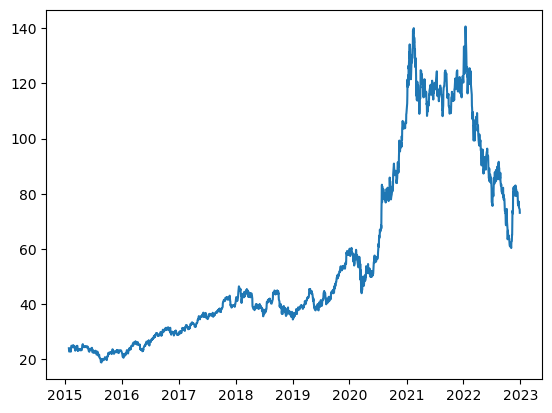

In [5]:
#plotting a graphic about tsmc prices from 2015 to 2022
x=tsmc["Date"]
y=tsmc["Price"]
plt.plot(x,y)

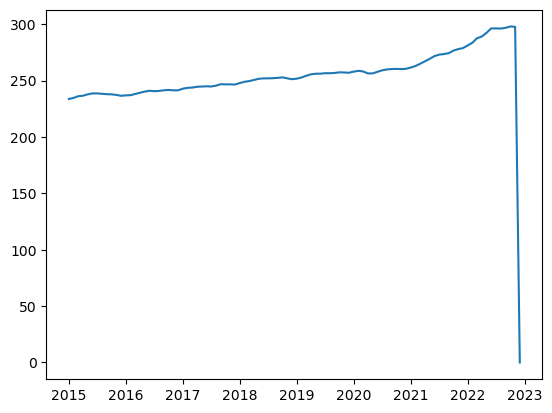

In [6]:
def cnv(row):
    datStr = '01 ' + row.Month + ' ' + str(row.Year)
    return pd.to_datetime(datStr, format='%d %b %Y').date()

df2 = inflation_from_2015.set_index('Year').stack().to_frame(name='Value')

df2 = df2.reset_index().rename(columns={'level_1': 'Month'})

df2['Date'] = df2.apply(cnv, axis=1)

df2 = df2.drop(['Year', 'Month'], axis=1).sort_index(axis=1)

df2

plt.plot(df2['Date'], df2['Value'])


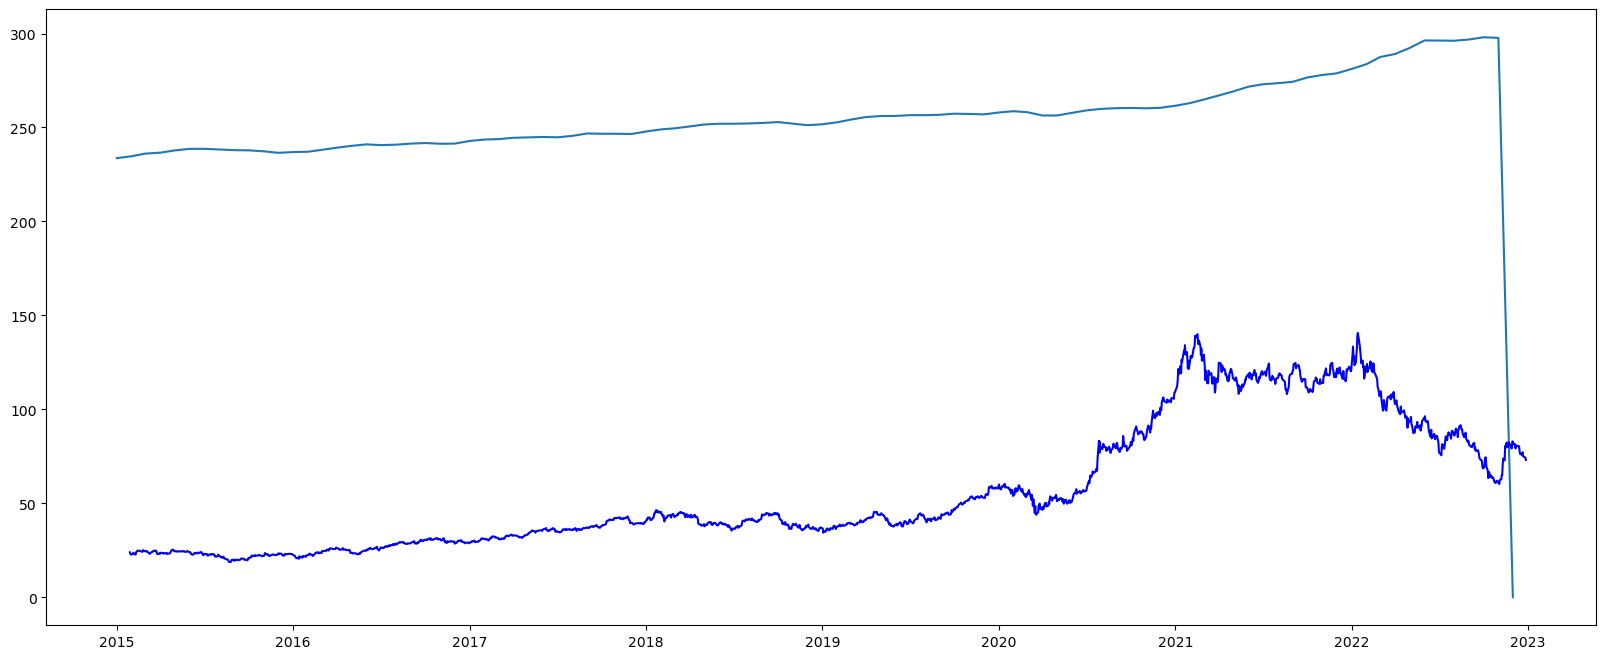

In [7]:
#plotting them together
plt.subplots(figsize=(20, 8))
x=tsmc["Date"]
y=tsmc["Price"]

plt.plot(df2['Date'], df2['Value'])
plt.plot(x,y, 'b')
plt.show()

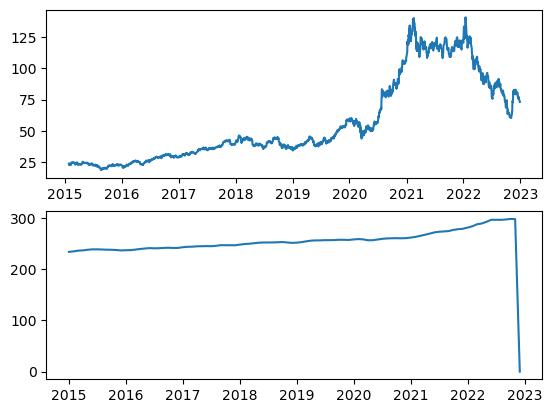

In [11]:
#plotting them together (second way)
x=tsmc["Date"]
y=tsmc["Price"]
plt.subplot(2, 1, 1)
plt.plot(x,y)

plt.subplot(2, 1, 2)
plt.plot(df2['Date'], df2['Value'])

plt.show()